# Results

## Installation
(recommended to use `uv`, but it's not required)
Please install the required packages in a .venv as listed in the requirements.txt file. You can do this by running the following command in your terminal using `uv`:

```bash
uv venv
uv pip install -r requirements.txt
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Combining and cleaning

Here we combine the data from the two surveys and clean it.

In [11]:
sheet1 = pd.read_csv("./source/survey_responses.csv")
sheet2 = pd.read_csv("./source/survey_responses_2_corrected.csv")

In [12]:
cols1 = sheet1.columns
cols2 = sheet2.columns
print(f"Columns in 1: {len(cols1)}, Columns in 2: {len(cols2)}")
print(f"Columns not shared: {(set(cols1) - set(cols2)) | (set(cols2) - set(cols1))}")

Columns in 1: 27, Columns in 2: 26
Columns not shared: {'What is your age?'}


In [13]:
df = pd.concat([sheet1, sheet2], axis=0).reset_index(drop=True)
# length:
print(f"Length of sheet1: {len(sheet1)}")
print(f"Length of sheet2: {len(sheet2)}")
print(f"Length of combined: {len(df)}")
df = df.drop(columns=["Timestamp"])
df = df.rename(
    columns={
        "Which gender identity best describes you?": "gender",
        "What configuration of the system did you interact with? Ask the assisting student if unsure.": "version",
        "What is your age?": "age",
    }
)
df["version"] = df["version"].map(lambda s: s.replace("Version ", ""))
df["Memory"] = df["version"].map(
    {
        "A": "Short-term only",
        "B": "Complete memory",
    }
)
df.to_csv("survey_results_cleaned.csv", index=False)

Length of sheet1: 14
Length of sheet2: 16
Length of combined: 30


## Load the data

We continue using the cleaned data.

In [31]:
df = pd.read_csv("survey_results_cleaned.csv")
df.head(5)

,The system is accurate,The system is unreliable,The interaction with the system is unpredictable,The system didn't always do what I wanted,The system didn't always do what I expected,The system is dependable,The system makes few errors,The interaction with the system is consistent,The interaction with the system is efficient,The system is useful,...,I felt in control of the interaction with the system,The interaction with the system is repetitive,The interaction with the system is boring,The interaction with the system is irritating,The interaction with the system is frustrating,The system is too inflexible,age,gender,version,Memory
0,5,4,3,2,5,2,5,7,3,6,...,6,7,2,2,3,3.0,23.0,Man,B,Complete memory
1,3,5,3,5,5,5,3,5,5,5,...,5,2,3,3,3,2.0,23.0,Man,A,Short-term only
2,6,1,1,1,2,6,7,7,6,7,...,6,1,2,1,1,3.0,24.0,Woman,B,Complete memory
3,3,6,2,3,3,4,2,3,2,5,...,6,5,5,5,2,5.0,23.0,Man,A,Short-term only
4,5,2,2,5,3,5,6,7,2,5,...,5,3,5,5,7,2.0,22.0,Man,B,Complete memory


In [8]:
print(f"Number of participants: {len(df)}")
print(f"Women: {(df['gender'] == 'Woman').sum()}, Men: {(df['gender'] == 'Man').sum()}")
print(f"Age: {df['age'].mean():.2f} ± {df['age'].std():.2f}")

Number of participants: 30
Women: 10, Men: 20
Age: 22.86 ± 1.56


# Compute Factors

In [33]:
factors = pd.read_csv("./factors.csv")
factors = factors.set_index("Component", drop=True)
factors = factors.rename(
    columns={
        "1": "System Response Accuracy",
        "2": "Likeability",
        "3": "Cognitive Demand",
        "4": "Annoyance",
        "5": "Habitability",
        "6": "Speed",
    }
)
# factors = factors.fillna(0)
factors.head()

,System Response Accuracy,Likeability,Cognitive Demand,Annoyance,Habitability,Speed
Component,,,,,,
The system is accurate,0.799,NaN,NaN,NaN,NaN,NaN
The system is unreliable,-0.736,NaN,NaN,NaN,NaN,NaN
The interaction with the system is unpredictable,-0.719,NaN,NaN,NaN,NaN,NaN
The system didn't always do what I wanted,-0.718,NaN,NaN,NaN,NaN,NaN
The system didn't always do what I expected,-0.713,NaN,NaN,NaN,NaN,NaN


In [34]:
print("--- Available survey components for each factor ---")
for f in factors.columns:
    relevant_components = factors[~factors[f].isna()].index
    matches = [col for col in df.columns if col in relevant_components]
    print(f"{f}: {len(matches)}/{len(relevant_components)}")

--- Available survey components for each factor ---
System Response Accuracy: 9/9
Likeability: 9/9
Cognitive Demand: 0/5
Annoyance: 5/5
Habitability: 0/4
Speed: 0/2


In [35]:
our_factors = ["System Response Accuracy", "Likeability", "Annoyance"]
for f in our_factors:
    loadings = factors[f].dropna()
    components = loadings.index
    responses = df[components]
    n = len(components)

    # This normalisation step isn't necessary, it just makes the result be nicely in the range [-1,+1]
    # Feel free to comment out
    loadings /= np.linalg.norm(loadings)  # make factor loadings a unit vector
    responses = (responses - 4) / 3  # normalize likert scale responses to [-1, +1]
    responses = (
        responses / np.sqrt(n)
    )  # normalize the response vector to be at most length 1, if all values were at their extremes

    # Compute the results with dot product between response and factor loadings for this factor
    df[f] = responses.dot(loadings)
df.head()

,The system is accurate,The system is unreliable,The interaction with the system is unpredictable,The system didn't always do what I wanted,The system didn't always do what I expected,The system is dependable,The system makes few errors,The interaction with the system is consistent,The interaction with the system is efficient,The system is useful,...,The interaction with the system is irritating,The interaction with the system is frustrating,The system is too inflexible,age,gender,version,Memory,System Response Accuracy,Likeability,Annoyance
0,5,4,3,2,5,2,5,7,3,6,...,2,3,3.0,23.0,Man,B,Complete memory,0.144067,0.484768,-0.133101
1,3,5,3,5,5,5,3,5,5,5,...,3,3,2.0,23.0,Man,A,Short-term only,-0.056485,0.184827,-0.457749
2,6,1,1,1,2,6,7,7,6,7,...,1,1,3.0,24.0,Woman,B,Complete memory,0.846748,0.929593,-0.810847
3,3,6,2,3,3,4,2,3,2,5,...,5,2,5.0,23.0,Man,A,Short-term only,-0.133133,0.409472,0.158574
4,5,2,2,5,3,5,6,7,2,5,...,5,7,2.0,22.0,Man,B,Complete memory,0.338486,0.479992,0.130344


# Compare

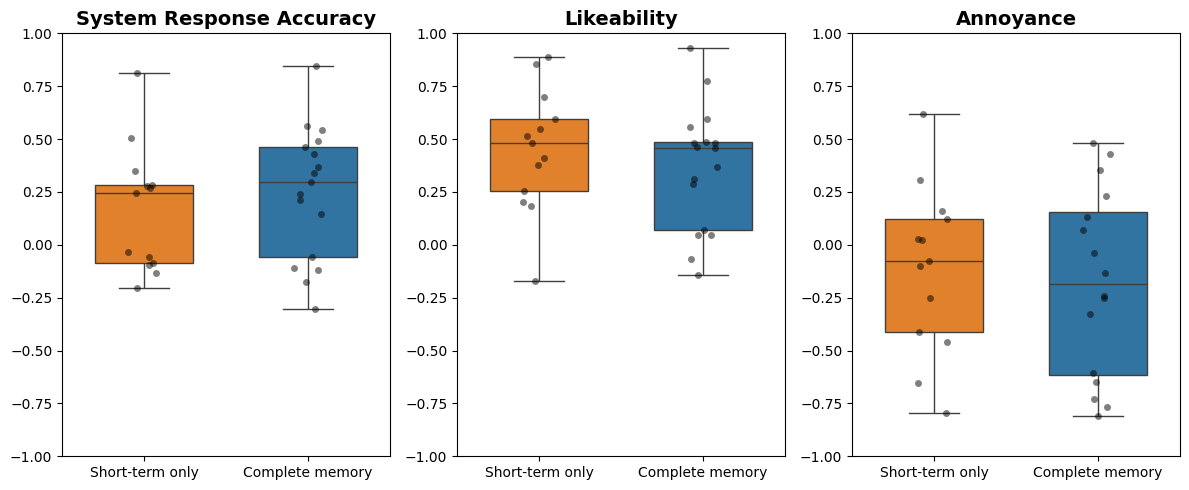

In [38]:
#  Create a figure with appropriate size
plt.figure(figsize=(12, 5))

# Create a boxplot for each factor, comparing versions A and B
for i, factor in enumerate(our_factors, 1):
    plt.subplot(1, 3, i)
    plt.ylim(-1, 1)

    # Create the boxplot
    sns.boxplot(
        x="Memory",
        y=factor,
        data=df,
        width=0.6,
        hue="Memory",  # Use Memory as hue parameter instead of palette
        legend=False,  # Hide the legend since it's redundant
        order=["Short-term only", "Complete memory"],
    )
    # Add individual data points for better visualization
    sns.stripplot(
        x="Memory",
        y=factor,
        data=df,
        color="black",
        alpha=0.5,
        jitter=True,
        size=5,
    )

    # Customize the plot
    plt.title(f"{factor}", fontsize=14, fontweight="bold")
    plt.xlabel("")
    plt.ylabel("")

# Adjust layout
plt.tight_layout()
# plt.show()
plt.savefig("survey_results.png", dpi=400)


In [19]:
import scipy.stats as stats

# Perform t-tests for each factor comparing the two memory conditions
print("T-test results comparing 'Short-term only' vs 'Complete memory':")
print("-" * 60)

num_sig = 0
for factor in our_factors:
    # Get data for each group
    short_term_data = df[df["Memory"] == "Short-term only"][factor].dropna()
    complete_memory_data = df[df["Memory"] == "Complete memory"][factor].dropna()

    # Perform two-sided independent t-test (non-paired)
    t_stat, p_value = stats.ttest_ind(
        short_term_data, complete_memory_data, equal_var=False
    )

    # Print results
    print(f"{factor}:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")

    # Indicate significance
    if p_value < 0.01:
        print("  ** Significant difference (p < 0.01)")
        num_sig += 1
    elif p_value < 0.05:
        print("  * Significant difference (p < 0.05)")
        num_sig += 1
    print()

print(f"Number of significant results: {num_sig}")


T-test results comparing 'Short-term only' vs 'Complete memory':
------------------------------------------------------------
System Response Accuracy:
  t-statistic: -0.7265
  p-value: 0.4739

Likeability:
  t-statistic: 0.8185
  p-value: 0.4205

Annoyance:
  t-statistic: 0.4081
  p-value: 0.6864

Number of significant results: 0


## Comprehensive Analysis

In [ ]:
# Load the cleaned data
df = pd.read_csv("survey_results_cleaned.csv")

#### MISSING DATA ANALYSIS

In [25]:
print("===== MISSING DATA ANALYSIS =====")
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values per column:")
for col, pct in missing_percentage[missing_percentage > 0].items():
    print(f"{col}: {pct:.1f}%")

# For Age specifically
print(
    f"\nAge missing values: {df['age'].isna().sum()} out of {len(df)} ({df['age'].isna().mean() * 100:.1f}%)"
)

# Create a copy with imputed age for comparison
df_imputed = df.copy()
df_imputed["age"] = df_imputed["age"].fillna(df_imputed["age"].median())
print(f"Median age (for imputation): {df_imputed['age'].median()}")

===== MISSING DATA ANALYSIS =====
Percentage of missing values per column:
The system is too inflexible: 3.3%
age: 53.3%
The system is too inflexible_reversed: 3.3%

Age missing values: 16 out of 30 (53.3%)
Median age (for imputation): 22.5


## Cronbach’s Alpha for Each Factor

In this cell we compute Cronbach’s Alpha to assess the internal consistency of the SASSI-derived factors. 
Note: For items with negative loadings (i.e., negatively worded items), we reverse score using:

```python
reversed_score = 8 - original_score
```

The raw responses (Likert scale 1–7) are used for this calculation.

In [53]:
factors = pd.read_csv("./factors.csv")
factors = factors.set_index("Component", drop=True)
factors = factors.rename(
    columns={
        "1": "System Response Accuracy",
        "2": "Likeability",
        "3": "Cognitive Demand",
        "4": "Annoyance",
        "5": "Habitability",
        "6": "Speed",
    }
)
# factors = factors.fillna(0)
factors.head()

print("--- Available survey components for each factor ---")
for f in factors.columns:
    relevant_components = factors[~factors[f].isna()].index
    matches = [col for col in df.columns if col in relevant_components]
    print(f"{f}: {len(matches)}/{len(relevant_components)}")

our_factors = ["System Response Accuracy", "Likeability", "Annoyance"]

--- Available survey components for each factor ---
System Response Accuracy: 9/9
Likeability: 9/9
Cognitive Demand: 0/5
Annoyance: 5/5
Habitability: 0/4
Speed: 0/2


                     Factor  Cronbach's Alpha
0  System Response Accuracy          0.788925
1               Likeability          0.778846
2                 Annoyance          0.778304


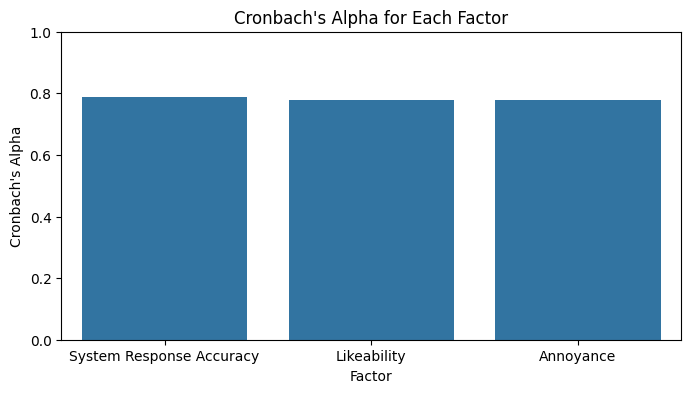

In [50]:
def compute_cronbach_alpha(df_items):
    """
    Compute Cronbach's Alpha for a set of items in a DataFrame.
    """
    n_items = df_items.shape[1]
    item_variances = df_items.var(ddof=1)
    total_score = df_items.sum(axis=1)
    total_variance = total_score.var(ddof=1)
    alpha = (n_items / (n_items - 1)) * (1 - item_variances.sum() / total_variance)
    return alpha


cronbach_alphas = {}
for factor in our_factors:
    # Get loadings for the current factor and extract the corresponding survey items.
    loadings = factors[factor].dropna()
    items = loadings.index.tolist()
    df_items = df[items].copy()  # extract raw responses

    # Reverse score items with negative loadings (Likert scale: 1-7)
    for item in items:
        if loadings[item] < 0:
            df_items[item] = 8 - df_items[item]

    # Compute and store Cronbach's Alpha
    alpha = compute_cronbach_alpha(df_items)
    cronbach_alphas[factor] = alpha

# Create a DataFrame for a clear report of the alpha values
alpha_df = pd.DataFrame(
    list(cronbach_alphas.items()), columns=["Factor", "Cronbach's Alpha"]
)
print(alpha_df)

# Plot a bar chart to visualize the internal consistency of each factor
plt.figure(figsize=(8, 4))
sns.barplot(x="Factor", y="Cronbach's Alpha", data=alpha_df)
plt.ylim(0, 1)
plt.title("Cronbach's Alpha for Each Factor")
# plt.show()
plt.savefig("cronbach_alpha_factors.png", dpi=400)

 ## Holm–Bonferroni Correction for Multiple Comparisons
 
 In this cell we first extract the raw p‐values from the independent t-tests for each factor 
 (comparing the two memory conditions). Then we apply the Holm–Bonferroni method to adjust these p‐values.
 The results are shown in a table, and we also provide a bar chart comparing the raw and adjusted p‐values 
 with the significance threshold marked at 0.05.


                     Factor   p_value  holm_adj  Reject H0
0  System Response Accuracy  0.473869       1.0      False
1               Likeability  0.420498       1.0      False
2                 Annoyance  0.686441       1.0      False


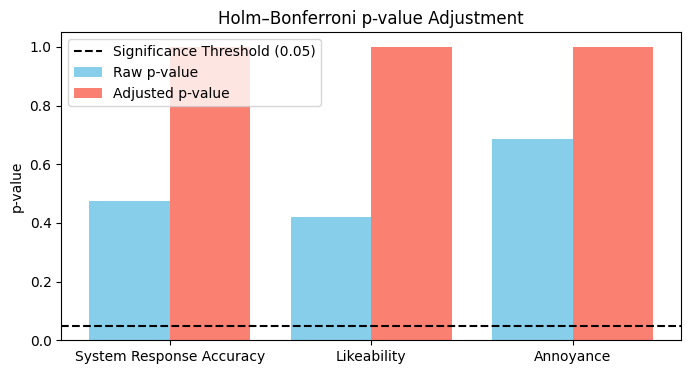

In [52]:
#  Collect raw p-values from the t-tests for each factor
holm_results = []
for factor in our_factors:
    short_term_data = df[df["Memory"] == "Short-term only"][factor].dropna()
    complete_memory_data = df[df["Memory"] == "Complete memory"][factor].dropna()
    t_stat, p_value = stats.ttest_ind(
        short_term_data, complete_memory_data, equal_var=False
    )
    holm_results.append((factor, p_value))

# Create a DataFrame for the results
holm_df = pd.DataFrame(holm_results, columns=["Factor", "p_value"])


# Define a function to compute Holm–Bonferroni adjusted p-values
def holm_bonferroni_adjust(p_vals):
    """
    Compute Holm-Bonferroni adjusted p-values.
    p_vals: array-like of raw p-values.
    Returns an array of adjusted p-values in the original order.
    """
    m = len(p_vals)
    p_vals = np.array(p_vals)
    sorted_indices = np.argsort(p_vals)
    sorted_p = p_vals[sorted_indices]
    adjusted = np.empty(m)

    # Compute the adjusted p-values for the sorted p-values
    for i in range(m):
        adjusted[i] = min((m - i) * sorted_p[i], 1.0)

    # Ensure adjusted p-values are non-decreasing
    for i in range(1, m):
        adjusted[i] = max(adjusted[i], adjusted[i - 1])

    # Map the adjusted p-values back to the original order
    adjusted_p = np.empty(m)
    adjusted_p[sorted_indices] = adjusted
    return adjusted_p


# Compute the adjusted p-values
holm_df["holm_adj"] = holm_bonferroni_adjust(holm_df["p_value"])
holm_df["Reject H0"] = holm_df["holm_adj"] < 0.05

print(holm_df)  # isplay the Holm–Bonferroni results table

plt.figure(figsize=(8, 4))
bar_width = 0.4
indices = np.arange(len(holm_df))

plt.bar(
    indices - bar_width / 2,
    holm_df["p_value"],
    width=bar_width,
    color="skyblue",
    label="Raw p-value",
)
plt.bar(
    indices + bar_width / 2,
    holm_df["holm_adj"],
    width=bar_width,
    color="salmon",
    label="Adjusted p-value",
)
plt.axhline(0.05, color="black", linestyle="--", label="Significance Threshold (0.05)")
plt.xticks(indices, holm_df["Factor"])
plt.ylabel("p-value")
plt.title("Holm–Bonferroni p-value Adjustment")
plt.legend()
plt.savefig("holm_bonferroni_results.png", dpi=400)
# plt.show()